In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
NFLX = pd.read_csv('netflix.csv')
NFLX

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


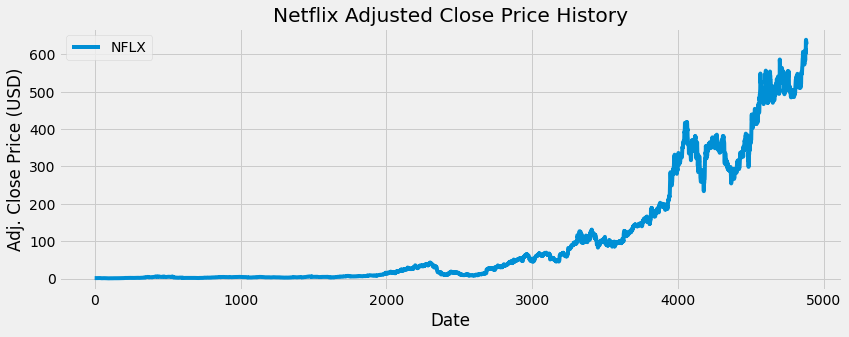

In [8]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(NFLX['Adj Close'], label='NFLX')
plt.title("Netflix Adjusted Close Price History")
plt.xlabel("Date")
plt.ylabel("Adj. Close Price (USD)")
plt.legend(loc='upper left')
plt.show()

In [9]:
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = NFLX['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4876,586.780332
4877,589.636666
4878,592.445664
4879,595.196997


In [10]:
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = NFLX['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4876,536.136099
4877,537.593399
4878,539.022499
4879,540.486299


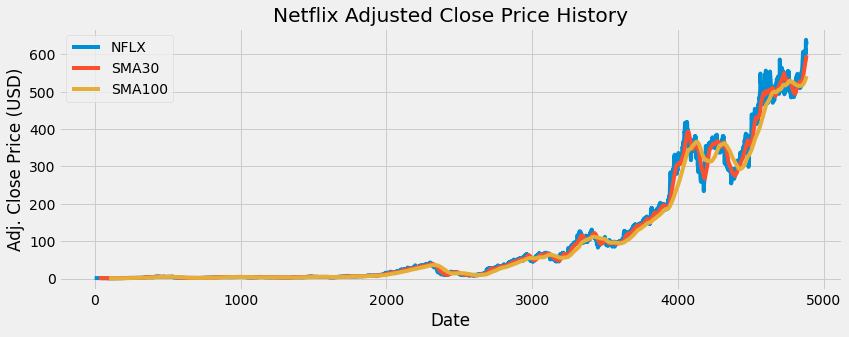

In [11]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(NFLX['Adj Close'], label='NFLX')
plt.plot(SMA30['Adj Close Price'], label='SMA30')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title("Netflix Adjusted Close Price History")
plt.xlabel("Date")
plt.ylabel("Adj. Close Price (USD)")
plt.legend(loc='upper left')
plt.show()

In [12]:
data = pd.DataFrame()
data['NFLX'] = NFLX['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,NFLX,SMA30,SMA100
0,1.196429,NaN,NaN
1,1.210000,NaN,NaN
2,1.157143,NaN,NaN
3,1.103571,NaN,NaN
4,1.071429,NaN,NaN
...,...,...,...
4876,634.809998,586.780332,536.136099
4877,639.099976,589.636666,537.593399
4878,631.849976,592.445664,539.022499
4879,632.659973,595.196997,540.486299


In [19]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['NFLX'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['NFLX'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)

In [20]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


In [21]:
data

,NFLX,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,1.196429,NaN,NaN,NaN,NaN
1,1.210000,NaN,NaN,NaN,NaN
2,1.157143,NaN,NaN,NaN,NaN
3,1.103571,NaN,NaN,NaN,NaN
4,1.071429,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4876,634.809998,586.780332,536.136099,NaN,NaN
4877,639.099976,589.636666,537.593399,NaN,NaN
4878,631.849976,592.445664,539.022499,NaN,NaN
4879,632.659973,595.196997,540.486299,NaN,NaN


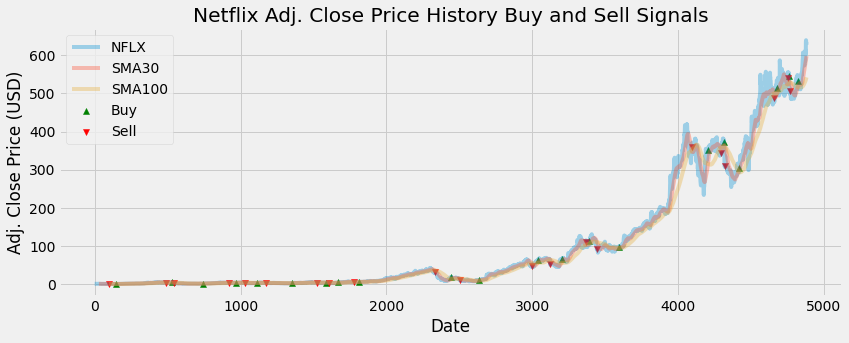

In [22]:
plt.figure(figsize=(12.5, 4.6))
plt.plot(data['NFLX'], label="NFLX", alpha=0.35)
plt.plot(data["SMA30"], label="SMA30", alpha=0.35)
plt.plot(data["SMA100"], label="SMA100", alpha=0.35)
plt.scatter(data.index, data["Buy_Signal_Price"], label="Buy", marker="^", color="green")
plt.scatter(data.index, data["Sell_Signal_Price"], label="Sell", marker="v", color="red")
plt.title("Netflix Adj. Close Price History Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Adj. Close Price (USD)")
plt.legend(loc="upper left")
plt.show()